In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from google.colab import files

In [4]:
# Upload the file using Google Colab's built-in file upload
uploaded_files = files.upload()  # Opens a file upload dialog in the Colab interface

# Read the uploaded file into a DataFrame
# The key to 'uploaded_files' is the name of the uploaded file
#Upload train2.csv dataset file for hatred speech data.
file_name = list(uploaded_files.keys())[0]  # Get the uploaded file name
df3 = pd.read_csv(file_name, encoding='ISO-8859-1')  # Read the CSV file into a DataFrame

Saving train2.csv to train2.csv


In [5]:
df3 

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?Ã°ÂÂÂÃ°ÂÂÂÃ°ÂÂ...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [6]:
df3.info()   # Print concise summary of DataFrame including index dtype and column dtypes, non-null values, and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [7]:
df3.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [8]:
df3.tail()

,id,label,tweet
31957,31958,0,ate @user isz that youuu?Ã°ÂÂÂÃ°ÂÂÂÃ°ÂÂ...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,31962,0,thank you @user for you follow


In [9]:
df3.shape

(31962, 3)

In [10]:
df3.dtypes

id        int64
label     int64
tweet    object
dtype: object

In [11]:
# Calculate the number of unique values in each column of the DataFrame df3.
df3.nunique()  

id       31962
label        2
tweet    29530
dtype: int64

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'label'}>]], dtype=object)

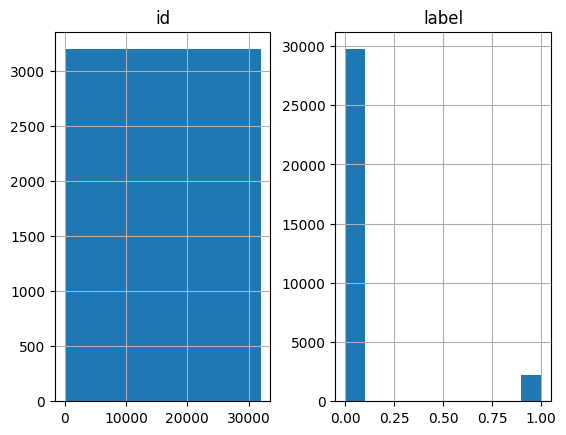

In [13]:
# Plot histograms for each numerical column in the DataFrame df3.
df3.hist()

In [14]:
# Count the number of occurrences of each label (1 and 0) in the 'label' column of the DataFrame df3 and store them in a list.
count3=[]
count3.append(int(df3.label.value_counts()[1]))
count3.append(int(df3.label.value_counts()[0]))

In [15]:
print(count3)

[2242, 29720]


In [16]:
# Calculate the sum of missing values (NaN) in each column of the DataFrame df3.
df3.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

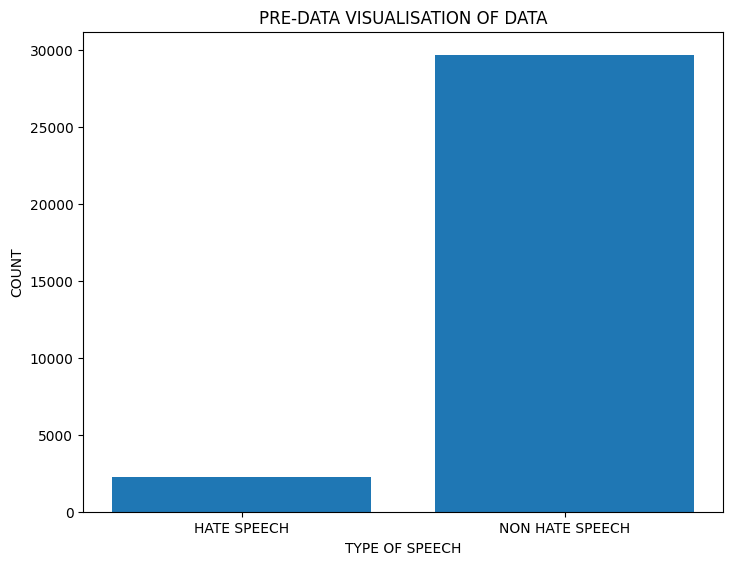

In [17]:
#PRE-DATA VISULAISATION - Graphical representation of data
fig3=plt.figure()
axes=fig3.add_axes([0,0,1,1])
label3=['HATE SPEECH','NON HATE SPEECH']
axes.bar(label3,count3)
plt.xlabel("TYPE OF SPEECH")
plt.ylabel("COUNT")
plt.title("PRE-DATA VISUALISATION OF DATA")
plt.show()

In [18]:
#DATA PREPROCESSING
#TOKENIZATION OF TEXT
import re
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize,word_tokenize

In [19]:
# Preprocess the 'tweet' column in the DataFrame df3 by removing non-alphanumeric characters and converting all text to lowercase.
preprocess1_3=[]
for each_row in range(df3.shape[0]):
    text=df3['tweet'].values[each_row]
    ctext=str(text)
    regex=re.sub('[^A-Za-z0-9!?]', ' ', ctext)
    preprocess1_3.append(regex)
df3["Preprocessed_1"]=preprocess1_3

In [20]:
df3[['Preprocessed_1']]

,Preprocessed_1
0,user when a father is dysfunctional and is s...
1,user user thanks for lyft credit i can t us...
2,bihday your majesty
3,model i love u take with u all the time in ...
4,factsguide society now motivation
...,...
31957,ate user isz that youuu? ...
31958,to see nina turner on the airwaves trying to...
31959,listening to sad songs on a monday morning otw...
31960,user sikh temple vandalised in in calgary ...


In [21]:
# Further preprocess the 'Preprocessed_1' column in the DataFrame df3 by removing non-alphabetic characters and retaining only alphabetic characters.
preprocess2_3=[]
for each_row in range(df3.shape[0]):
    text=df3['Preprocessed_1'].values[each_row]
    ctext_p1=str(text)
    regex_p1=re.sub('[^A-Za-z]', ' ', ctext_p1)
    preprocess2_3.append(regex_p1)
df3["Preprocessed_2"]=preprocess2_3

In [22]:
df3[['Preprocessed_2']]

,Preprocessed_2
0,user when a father is dysfunctional and is s...
1,user user thanks for lyft credit i can t us...
2,bihday your majesty
3,model i love u take with u all the time in ...
4,factsguide society now motivation
...,...
31957,ate user isz that youuu ...
31958,to see nina turner on the airwaves trying to...
31959,listening to sad songs on a monday morning otw...
31960,user sikh temple vandalised in in calgary ...


In [23]:
# Convert the text in the 'Preprocessed_2' column of the DataFrame df3 to lowercase.
preprocess3_3=[]
for each_row in range(df3.shape[0]):
    text=df3['Preprocessed_2'].values[each_row]
    ctext_p2=str(text)
    regex_p2=ctext_p2.lower()
    preprocess3_3.append(regex_p2)
df3["Preprocessed_3"]=preprocess3_3

In [24]:
df3[['Preprocessed_3']]

,Preprocessed_3
0,user when a father is dysfunctional and is s...
1,user user thanks for lyft credit i can t us...
2,bihday your majesty
3,model i love u take with u all the time in ...
4,factsguide society now motivation
...,...
31957,ate user isz that youuu ...
31958,to see nina turner on the airwaves trying to...
31959,listening to sad songs on a monday morning otw...
31960,user sikh temple vandalised in in calgary ...


In [25]:
# Download the stopwords corpus, punkt tokenizer models, and WordNet corpus from NLTK.
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [26]:
# Import the stopwords list from NLTK's English corpus.
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
stopwords_list=stopwords.words('english')

In [27]:
# Tokenize the text in the 'Preprocessed_3' column of the DataFrame df3 and remove stopwords, then concatenate the remaining words into a single string.
preprocess4_3=[]
for each_row in range(df3.shape[0]):
    text=df3['Preprocessed_3'].values[each_row]
    tokenized_words=word_tokenize(text)
    clean_words=[]
    for each_word in tokenized_words:
        if not each_word in stopwords_list:
            clean_words.append(each_word)
    dre=''
    for each_data in clean_words:
        dre=dre+str(each_data)+' '
    preprocess4_3.append(dre)
df3['Preprocessed_4']=preprocess4_3

In [28]:
df3[['Preprocessed_4']]

,Preprocessed_4
0,user father dysfunctional selfish drags kids d...
1,user user thanks lyft credit use cause offer w...
2,bihday majesty
3,model love u take u time ur
4,factsguide society motivation
...,...
31957,ate user isz youuu
31958,see nina turner airwaves trying wrap mantle ge...
31959,listening sad songs monday morning otw work sad
31960,user sikh temple vandalised calgary wso condem...


In [29]:
# Import the WordNetLemmatizer from NLTK's stem module.
from nltk.stem import WordNetLemmatizer
lm=WordNetLemmatizer()

In [30]:
# Lemmatize the words in the 'Preprocessed_4' column of the DataFrame df3 using the WordNetLemmatizer.
preprocess5_3=[]
for each_row in range(df3.shape[0]):
    text=df3['Preprocessed_4'].values[each_row]
    tokenized_words=word_tokenize(text)
    clean_words=[]
    for each_word in tokenized_words:
        clean_words.append(lm.lemmatize(each_word))
    dre=''
    for each_data in clean_words:
        dre=dre+str(each_data)+' '
    preprocess5_3.append(dre)
df3['Preprocessed_5']=preprocess5_3

In [31]:
df3[['Preprocessed_5']]

,Preprocessed_5
0,user father dysfunctional selfish drag kid dys...
1,user user thanks lyft credit use cause offer w...
2,bihday majesty
3,model love u take u time ur
4,factsguide society motivation
...,...
31957,ate user isz youuu
31958,see nina turner airwave trying wrap mantle gen...
31959,listening sad song monday morning otw work sad
31960,user sikh temple vandalised calgary wso condem...


In [32]:
#removing empty rows
df3=df3[df3['Preprocessed_5']!='']

In [33]:
df3.shape

(31949, 8)

In [34]:
df3[['Preprocessed_5']]

,Preprocessed_5
0,user father dysfunctional selfish drag kid dys...
1,user user thanks lyft credit use cause offer w...
2,bihday majesty
3,model love u take u time ur
4,factsguide society motivation
...,...
31957,ate user isz youuu
31958,see nina turner airwave trying wrap mantle gen...
31959,listening sad song monday morning otw work sad
31960,user sikh temple vandalised calgary wso condem...


In [35]:
# Create a new DataFrame containing cleaned tweets and sentiment labels.
per=list()
per=df3['Preprocessed_5'].to_list()
df_3 = pd.DataFrame()
df_3['Clean Tweets']=per
df_3['Sentiment']=df3['label'].to_list()

In [36]:
df_3

,Clean Tweets,Sentiment
0,user father dysfunctional selfish drag kid dys...,0
1,user user thanks lyft credit use cause offer w...,0
2,bihday majesty,0
3,model love u take u time ur,0
4,factsguide society motivation,0
...,...,...
31944,ate user isz youuu,0
31945,see nina turner airwave trying wrap mantle gen...,0
31946,listening sad song monday morning otw work sad,0
31947,user sikh temple vandalised calgary wso condem...,1


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns


In [38]:
#As we see the above dataset is imbalanced. So, we are performing an Over Sampling technique inorder to remove the imbalance in the dataset.
# Upload the file using Google Colab's built-in file upload
uploaded_files = files.upload()  # Opens a file upload dialog in the Colab interface

# Read the uploaded file into a DataFrame
#Upload train3.csv dataset file for hatred speech data.
file_name = list(uploaded_files.keys())[0]  # Get the uploaded file name
df = pd.read_csv(file_name, encoding='ISO-8859-1')  # Read the CSV file into a DataFrame


Saving train3.csv to train3.csv


In [39]:
df.head()


,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [40]:
df.tail()


,ItemID,Sentiment,SentimentText
99984,99996,0,@Cupcake seems like a repeating problem hop...
99985,99997,1,@cupcake__ arrrr we both replied to each other...
99986,99998,0,@CuPcAkE_2120 ya i thought so
99987,99999,1,@Cupcake_Dollie Yes. Yes. I'm glad you had mor...
99988,100000,1,@cupcake_kayla haha yes you do


In [41]:
#rows and columns of dataset
df.shape

(99989, 3)

In [42]:
# Count the occurrences of each sentiment label and print the counts.
count=[]
count.append(int(df.Sentiment.value_counts()[1]))
count.append(int(df.Sentiment.value_counts()[0]))
print(count)


[56457, 43532]


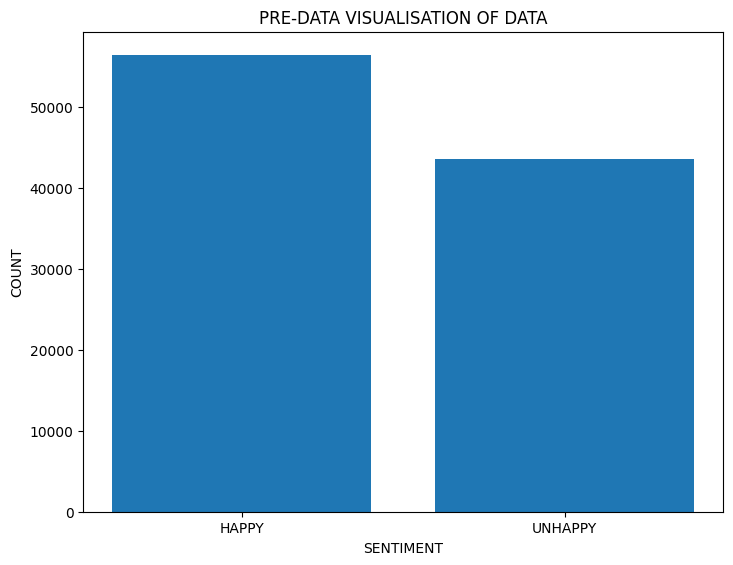

In [43]:
#PRE-DATA VISULAISATION - Graphical representation of data
fig1=plt.figure()
axes=fig1.add_axes([0,0,1,1])
label=['HAPPY','UNHAPPY']
axes.bar(label,count)
plt.xlabel("SENTIMENT")
plt.ylabel("COUNT")
plt.title("PRE-DATA VISUALISATION OF DATA")
plt.show()


In [44]:
#DATA PREPROCESSING
#TOKENIZATION OF TEXT
import re
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize,word_tokenize
preprocess1=[]
for each_row in range(df.shape[0]):
    text=df['SentimentText'].values[each_row]
    ctext=str(text)
    regex=re.sub('[^A-Za-z0-9!?]', ' ', ctext)
    preprocess1.append(regex)
df["Preprocessed_1"]=preprocess1
df[['Preprocessed_1']]


,Preprocessed_1
0,is so sad for my APL frie...
1,I missed the New Moon trail...
2,omg its already 7 30 O
3,Omgaga Im sooo im gunna CRy I ...
4,i think mi bf is cheating on me!!! ...
...,...
99984,Cupcake seems like a repeating problem hop...
99985,cupcake arrrr we both replied to each other...
99986,CuPcAkE 2120 ya i thought so
99987,Cupcake Dollie Yes Yes I m glad you had mor...


In [45]:
# Further preprocess the 'Preprocessed_1' column and display the result in the 'Preprocessed_2' column.
preprocess2=[]
for each_row in range(df.shape[0]):
    text=df['Preprocessed_1'].values[each_row]
    ctext_p1=str(text)
    regex_p1=re.sub('[^A-Za-z]', ' ', ctext_p1)
    preprocess2.append(regex_p1)
df["Preprocessed_2"]=preprocess2
df[['Preprocessed_2']]


,Preprocessed_2
0,is so sad for my APL frie...
1,I missed the New Moon trail...
2,omg its already O
3,Omgaga Im sooo im gunna CRy I ...
4,i think mi bf is cheating on me ...
...,...
99984,Cupcake seems like a repeating problem hop...
99985,cupcake arrrr we both replied to each other...
99986,CuPcAkE ya i thought so
99987,Cupcake Dollie Yes Yes I m glad you had mor...


In [46]:
# Convert the text in the 'Preprocessed_2' column to lowercase and display the result in the 'Preprocessed_3' column.
preprocess3=[]
for each_row in range(df.shape[0]):
    text=df['Preprocessed_2'].values[each_row]
    ctext_p2=str(text)
    regex_p2=ctext_p2.lower()
    preprocess3.append(regex_p2)
df["Preprocessed_3"]=preprocess3
df[['Preprocessed_3']]


,Preprocessed_3
0,is so sad for my apl frie...
1,i missed the new moon trail...
2,omg its already o
3,omgaga im sooo im gunna cry i ...
4,i think mi bf is cheating on me ...
...,...
99984,cupcake seems like a repeating problem hop...
99985,cupcake arrrr we both replied to each other...
99986,cupcake ya i thought so
99987,cupcake dollie yes yes i m glad you had mor...


In [47]:
# Download the stopwords corpus from NLTK and import the stopwords list from the English corpus.
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
stopwords_list=stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
# Tokenize text, remove stopwords, and display the result.
import nltk
nltk.download('punkt')
preprocess4=[]
for each_row in range(df.shape[0]):
    text=df['Preprocessed_3'].values[each_row]
    tokenized_words=word_tokenize(text)
    clean_words=[]
    for each_word in tokenized_words:
        if not each_word in stopwords_list:
            clean_words.append(each_word)
    dre=''
    for each_data in clean_words:
        dre=dre+str(each_data)+' '
    preprocess4.append(dre)
df['Preprocessed_4']=preprocess4
df[['Preprocessed_4']]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Preprocessed_4
0,sad apl friend
1,missed new moon trailer
2,omg already
3,omgaga im sooo im gunna cry dentist since supo...
4,think mi bf cheating
...,...
99984,cupcake seems like repeating problem hope able...
99985,cupcake arrrr replied different tweets time se...
99986,cupcake ya thought
99987,cupcake dollie yes yes glad fun


In [49]:
# Lemmatize words and display the result.
from nltk.stem import WordNetLemmatizer
lm=WordNetLemmatizer()
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

preprocess_5=[]
for each_row in range(df.shape[0]):
    text=df['Preprocessed_4'].values[each_row]
    tokenized_words=word_tokenize(text)
    clean_words=[]
    for each_word in tokenized_words:
        clean_words.append(lm.lemmatize(each_word))
    dre=''
    for each_data in clean_words:
        dre=dre+str(each_data)+' '
    preprocess_5.append(dre)
df['Preprocessed_5']=preprocess_5
df[['Preprocessed_5']]


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,Preprocessed_5
0,sad apl friend
1,missed new moon trailer
2,omg already
3,omgaga im sooo im gunna cry dentist since supo...
4,think mi bf cheating
...,...
99984,cupcake seems like repeating problem hope able...
99985,cupcake arrrr replied different tweet time see...
99986,cupcake ya thought
99987,cupcake dollie yes yes glad fun


In [50]:
#removing empty rows
df=df[df['Preprocessed_5']!='']
df.shape
df[['Preprocessed_5']]
per=list()
df2 = pd.DataFrame()
df2['Clean Tweets']=df['Preprocessed_5']
df2['Sentiment']=df['Sentiment']


In [51]:
df2

,Clean Tweets,Sentiment
0,sad apl friend,0
1,missed new moon trailer,0
2,omg already,1
3,omgaga im sooo im gunna cry dentist since supo...,0
4,think mi bf cheating,0
...,...,...
99984,cupcake seems like repeating problem hope able...,0
99985,cupcake arrrr replied different tweet time see...,1
99986,cupcake ya thought,0
99987,cupcake dollie yes yes glad fun,1


[56447, 43510]


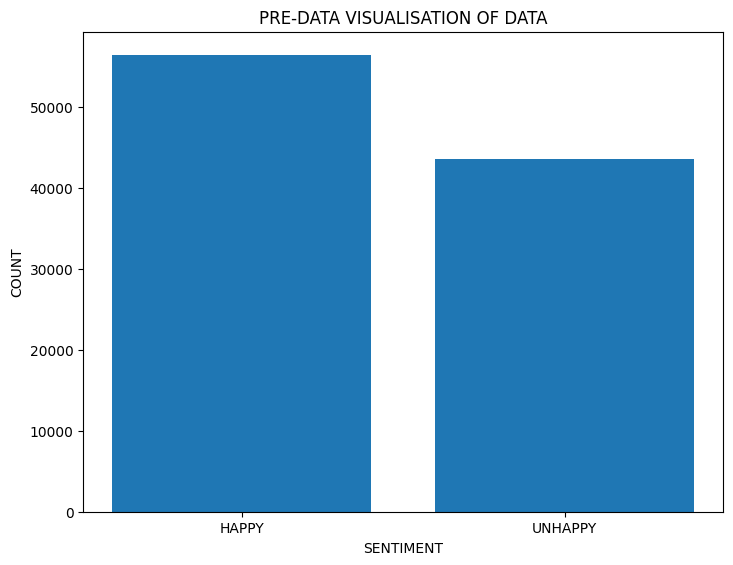

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,Clean Tweets,Sentiment
0,sad apl friend,0
1,missed new moon trailer,0
2,omg already,1
3,omgaga im sooo im gunna cry dentist since supo...,0
4,think mi bf cheating,0
...,...,...
99984,cupcake seems like repeating problem hope able...,0
99985,cupcake arrrr replied different tweet time see...,1
99986,cupcake ya thought,0
99987,cupcake dollie yes yes glad fun,1


In [52]:
count=[]
count.append(int(df.Sentiment.value_counts()[1]))
count.append(int(df.Sentiment.value_counts()[0]))
print(count)
#PRE-DATA VISULAISATION - Graphical representation of data
fig1=plt.figure()
axes=fig1.add_axes([0,0,1,1])
label=['HAPPY','UNHAPPY']
axes.bar(label,count)
plt.xlabel("SENTIMENT")
plt.ylabel("COUNT")
plt.title("PRE-DATA VISUALISATION OF DATA")
plt.show()
#DATA PREPROCESSING
#TOKENIZATION OF TEXT
import re
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize,word_tokenize
preprocess1=[]
for each_row in range(df.shape[0]):
    text=df['SentimentText'].values[each_row]
    ctext=str(text)
    regex=re.sub('[^A-Za-z0-9!?]', ' ', ctext)
    preprocess1.append(regex)
df["Preprocessed_1"]=preprocess1
df[['Preprocessed_1']]
preprocess2=[]
for each_row in range(df.shape[0]):
    text=df['Preprocessed_1'].values[each_row]
    ctext_p1=str(text)
    regex_p1=re.sub('[^A-Za-z]', ' ', ctext_p1)
    preprocess2.append(regex_p1)
df["Preprocessed_2"]=preprocess2
df[['Preprocessed_2']]
preprocess3=[]
for each_row in range(df.shape[0]):
    text=df['Preprocessed_2'].values[each_row]
    ctext_p2=str(text)
    regex_p2=ctext_p2.lower()
    preprocess3.append(regex_p2)
df["Preprocessed_3"]=preprocess3
df[['Preprocessed_3']]
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
stopwords_list=stopwords.words('english')
import nltk
nltk.download('punkt')
preprocess4=[]
for each_row in range(df.shape[0]):
    text=df['Preprocessed_3'].values[each_row]
    tokenized_words=word_tokenize(text)
    clean_words=[]
    for each_word in tokenized_words:
        if not each_word in stopwords_list:
            clean_words.append(each_word)
    dre=''
    for each_data in clean_words:
        dre=dre+str(each_data)+' '
    preprocess4.append(dre)
df['Preprocessed_4']=preprocess4
df[['Preprocessed_4']]
from nltk.stem import WordNetLemmatizer
lm=WordNetLemmatizer()
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

preprocess_5=[]
for each_row in range(df.shape[0]):
    text=df['Preprocessed_4'].values[each_row]
    tokenized_words=word_tokenize(text)
    clean_words=[]
    for each_word in tokenized_words:
        clean_words.append(lm.lemmatize(each_word))
    dre=''
    for each_data in clean_words:
        dre=dre+str(each_data)+' '
    preprocess_5.append(dre)
df['Preprocessed_5']=preprocess_5
df[['Preprocessed_5']]
#removing empty rows
df=df[df['Preprocessed_5']!='']
df.shape
df[['Preprocessed_5']]
per=list()
df2 = pd.DataFrame()
df2['Clean Tweets']=df['Preprocessed_5']
df2['Sentiment']=df['Sentiment']
df2

In [53]:
df2.head()

,Clean Tweets,Sentiment
0,sad apl friend,0
1,missed new moon trailer,0
2,omg already,1
3,omgaga im sooo im gunna cry dentist since supo...,0
4,think mi bf cheating,0


In [54]:
df2.shape

(99957, 2)

In [55]:
df_3.shape

(31949, 2)

In [56]:
# Concatenate two DataFrames, df2 and df_3, along the rows to create a combined DataFrame, combined_df.
combined_df = pd.concat([df2, df_3])

In [57]:
combined_df.shape

(131906, 2)

In [58]:
# Calculate the total number of rows in the DataFrames df2 and df_3 by summing their respective shapes along the rows.
df2.shape[0]+df_3.shape[0]

131906

In [59]:
# Count the number of occurrences of each sentiment label (1 and 0) in the 'Sentiment' column of the combined DataFrame combined_df and store them in a list.
count3=[]
count3.append(int(combined_df.Sentiment.value_counts()[1]))
count3.append(int(combined_df.Sentiment.value_counts()[0]))

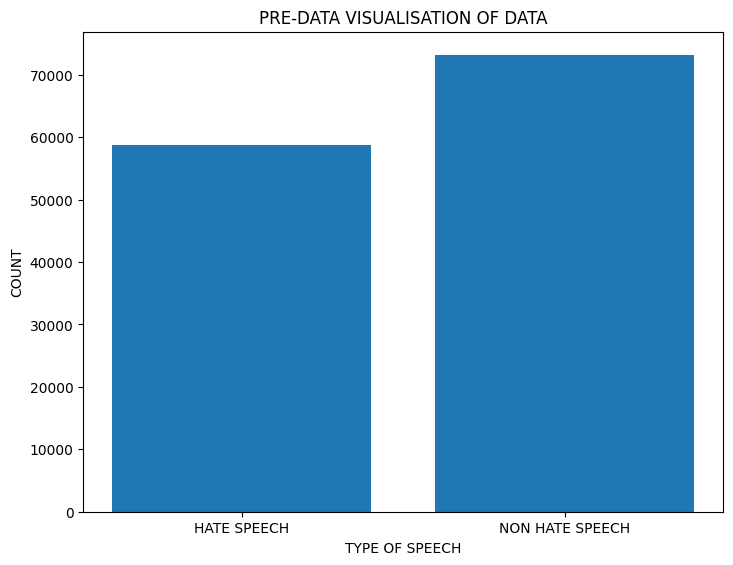

In [60]:
#PRE-DATA VISULAISATION - Graphical representation of data After performing the Over Sampling
fig3=plt.figure()
axes=fig3.add_axes([0,0,1,1])
label3=['HATE SPEECH','NON HATE SPEECH']
axes.bar(label3,count3)
plt.xlabel("TYPE OF SPEECH")
plt.ylabel("COUNT")
plt.title("PRE-DATA VISUALISATION OF DATA")
plt.show()

In [61]:
#FEATURE EXTRACTION - Mapping from textual data into real valued vectors for making compatible with model
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf=TfidfVectorizer()        #Loading tfidf function to our variable
comp_transformed_matrix=tf_idf.fit_transform(combined_df['Clean Tweets'])

In [62]:
print(comp_transformed_matrix.shape)

(131906, 113711)


In [63]:
from sklearn.model_selection import train_test_split

In [64]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [65]:
# Split data into training and testing sets.
x_train,x_test,y_train,y_test=train_test_split(comp_transformed_matrix,combined_df['Sentiment'],train_size=0.7577896381)

In [66]:
x_train.shape

(99957, 113711)

In [67]:
x_test.shape

(31949, 113711)

In [68]:
y_train.shape

(99957,)

In [69]:
y_test.shape

(31949,)

**RANDOM FOREST**

In [70]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [71]:
# Train a RANDOM FOREST classifier on the training data (x_train, y_train).
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [72]:
y_pred1=rfc.predict(x_test)

In [73]:
# Evaluate RANDOM FOREST classifier performance with weighted averaging.
rf1=accuracy_score(y_pred1,y_test)
rf2=precision_score(y_pred1,y_test,average='weighted')
rf3=recall_score(y_pred1,y_test,average='weighted')
rf4=f1_score(y_pred1,y_test,average='weighted')

In [74]:
print(rf1,rf2,rf3,rf4)

0.7444364455851513 0.7496382474316282 0.7444364455851513 0.7459086405904357


**LOGISTIC REGRESSION**

In [75]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
lrc=LogisticRegression(max_iter=250)

In [76]:
# Train a Logistic Regression classifier on the training data (x_train, y_train).
lrc.fit(x_train,y_train)

LogisticRegression(max_iter=250)

In [77]:
y_pred2=lrc.predict(x_test)

In [78]:
# Evaluate Logistic Regression classifier performance.
lrc1=accuracy_score(y_pred2,y_test)
lrc2=precision_score(y_pred2,y_test)
lrc3=recall_score(y_pred2,y_test)
lrc4=f1_score(y_pred2,y_test)

In [79]:
print(lrc1,lrc2,lrc3,lrc4)

0.7606497855957933 0.7153657682884145 0.7405072463768116 0.7277194231796333


**NAIVEBAYES**

In [80]:
#NAIVEBayes
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [81]:
# Train a Naive Bayes classifier on the training data (x_train, y_train).
nb.fit(x_train,y_train)

MultinomialNB()

In [82]:
y_pred3=nb.predict(x_test)

In [83]:
# Evaluate Naive Bayes classifier performance.
nb1=accuracy_score(y_pred3,y_test)
nb2=precision_score(y_pred3,y_test)
nb3=recall_score(y_pred3,y_test)
nb4=f1_score(y_pred3,y_test)

In [84]:
print(nb1,nb2,nb3,nb4)

0.7321668909825033 0.5386769338466924 0.7964189608776651 0.6426692278782311


**SGD**

In [85]:
#SGD
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(loss="log")

In [86]:
sgd.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


SGDClassifier(loss='log')

In [87]:
y_pred4=sgd.predict(x_test)

In [88]:
# Evaluate sgd performance.
sgd1=accuracy_score(y_pred4,y_test)
sgd2=precision_score(y_pred4,y_test)
sgd3=recall_score(y_pred4,y_test)
sgd4=f1_score(y_pred4,y_test)

In [89]:
print(sgd1,sgd2,sgd3,sgd4)

0.7346395818335472 0.6150507525376269 0.7467913302167446 0.6745489443378119


**SUPPORT VECTOR MACHINE**

In [90]:
#Support Vector Machine
from sklearn.svm import SVC
svc=SVC()

In [91]:
# Train a Support Vector Classifier on the training data (x_train, y_train).
svc.fit(x_train,y_train)

SVC()

In [92]:
y_pred5=svc.predict(x_test)

In [93]:
# Evaluate Support Vector Machine classifier performance.
svc1=accuracy_score(y_pred5,y_test)
svc2=precision_score(y_pred5,y_test)
svc3=recall_score(y_pred5,y_test)
svc4=f1_score(y_pred5,y_test)

In [94]:
print(svc1,svc2,svc3,svc4)

0.7690694544430186 0.7312565628281414 0.7469431533786199 0.7390166253979483


**GradientBoostingMachine**

In [95]:
#GradientBoostingMachine
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()

In [96]:
# Train a GradientBoostingMachine on the training data (x_train, y_train).
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [97]:
y_pred6=gbc.predict(x_test)

In [98]:
# Evaluate GradientBoostingMachine classifier performance.
gbc1=accuracy_score(y_pred6,y_test)
gbc2=precision_score(y_pred6,y_test)
gbc3=recall_score(y_pred6,y_test)
gbc4=f1_score(y_pred6,y_test)

In [99]:
print(gbc1,gbc2,gbc3,gbc4)

0.6689411249178379 0.399789989499475 0.7403422348975888 0.5192054184281103


**Voting Classifier(Logistic Regresion & SVM)**

In [101]:
#Voting Classifier(logistic regresion & SVM)
from sklearn.ensemble import VotingClassifier
one=LogisticRegression(max_iter=250)
two=SVC()
vc=VotingClassifier(estimators=[('logistic',one),('SVM',two)],voting='hard')
vc.fit(x_train,y_train)
y_pred7=vc.predict(x_test)
print(y_pred7)

[0 0 0 ... 0 1 1]


In [102]:
# Evaluate Voting Classifier performance.
vc1=accuracy_score(y_pred7,y_test)
vc2=precision_score(y_pred7,y_test)
vc3=recall_score(y_pred7,y_test)
vc4=f1_score(y_pred7,y_test)

In [103]:
print(vc1,vc2,vc3,vc4)

0.7645309712354065 0.6988449422471124 0.7560587700696758 0.7263268943941213


Text(0.5, 1.0, 'Representation of measures')

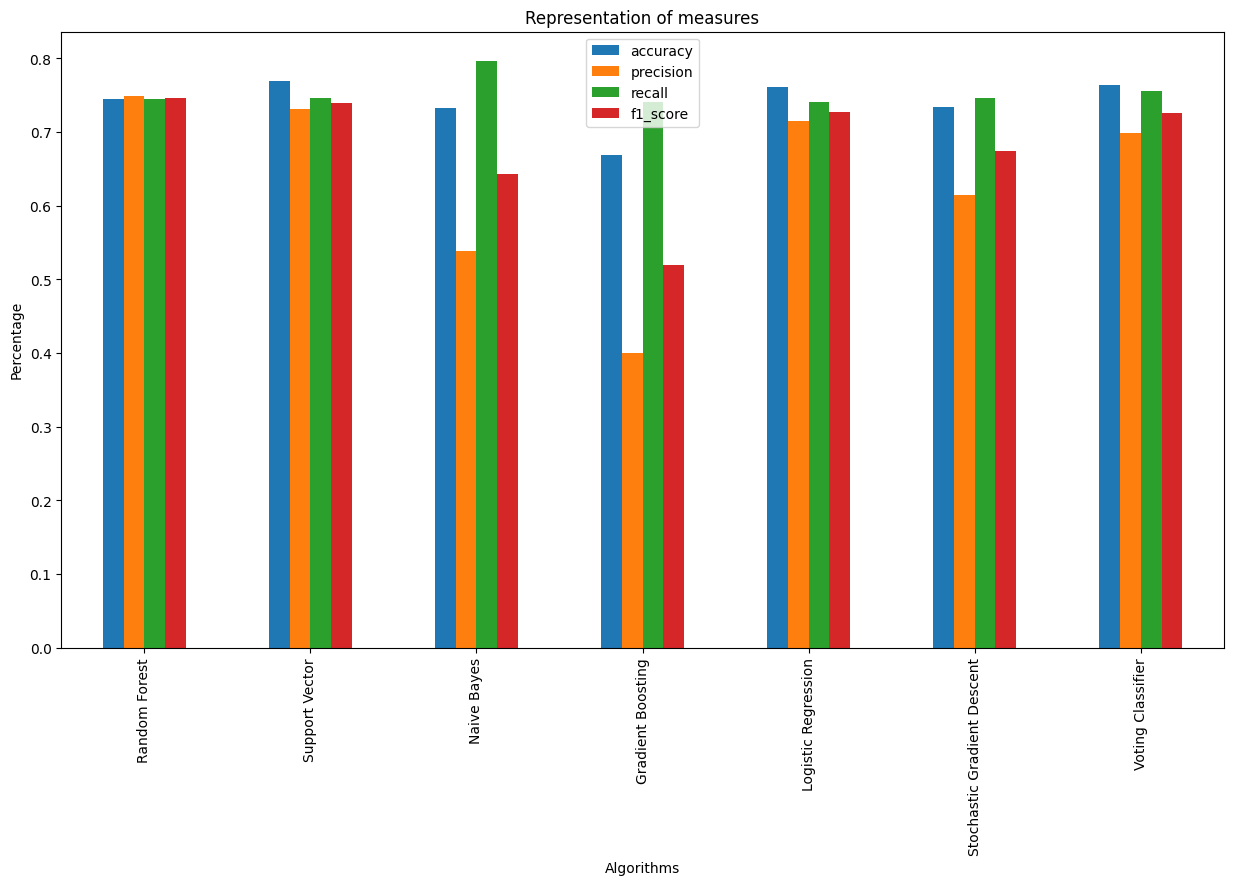

In [104]:
# Visualize performance measures of different algorithms using a bar plot.
graph=pd.DataFrame({"accuracy":[rf1,svc1,nb1,gbc1,lrc1,sgd1,vc1],
                    "precision":[rf2,svc2,nb2,gbc2,lrc2,sgd2,vc2],
                     "recall":[rf3,svc3,nb3,gbc3,lrc3,sgd3,vc3],
                     "f1_score":[rf4,svc4,nb4,gbc4,lrc4,sgd4,vc4]},
                  index=["Random Forest","Support Vector","Naive Bayes","Gradient Boosting","Logistic Regression","Stochastic Gradient Descent","Voting Classifier"])
graph.plot(kind='bar',figsize=(15,8))
plt.xlabel("Algorithms")
plt.ylabel("Percentage")
plt.title("Representation of measures")

In [105]:
# Display performance measures of different algorithms in a tabular format using PrettyTable.
from prettytable import PrettyTable

myTable = PrettyTable(["Models", "Accuracy", "Precision", "Recall","F1_Score"])

# Add rows
myTable.add_row(["RF", round(rf1*100,1),round(rf2*100,1),round(rf3*100,1),round(rf4*100,1)])
myTable.add_row(["SVM", round(svc1*100,1),round(svc2*100,1),round(svc3*100,1),round(svc4*100,1)])
myTable.add_row(["NB", round(nb1*100,1),round(nb2*100,1),round(nb3*100,1),round(nb4*100,1)])
myTable.add_row(["GB", round(gbc1*100,1),round(gbc2*100,1),round(gbc3*100,1),round(gbc4*100,1)])
myTable.add_row(["LR", round(lrc1*100,1),round(lrc2*100,1),round(lrc3*100,1),round(lrc4*100,1)])
myTable.add_row(["SGD", round(sgd1*100,1),round(sgd2*100,1),round(sgd3*100,1),round(sgd4*100,1)])
myTable.add_row(["VC", round(vc1*100,1),round(vc2*100,1),round(vc3*100,1),round(vc4*100,1)])

print(myTable)

+--------+----------+-----------+--------+----------+
| Models | Accuracy | Precision | Recall | F1_Score |
+--------+----------+-----------+--------+----------+
|   RF   |   74.4   |    75.0   |  74.4  |   74.6   |
|  SVM   |   76.9   |    73.1   |  74.7  |   73.9   |
|   NB   |   73.2   |    53.9   |  79.6  |   64.3   |
|   GB   |   66.9   |    40.0   |  74.0  |   51.9   |
|   LR   |   76.1   |    71.5   |  74.1  |   72.8   |
|  SGD   |   73.5   |    61.5   |  74.7  |   67.5   |
|   VC   |   76.5   |    69.9   |  75.6  |   72.6   |
+--------+----------+-----------+--------+----------+
